In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
tele=pd.read_excel('Week2_challenge_data_source.xlsx')
tele.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Task 1

In [3]:
tele['Handset Type'].value_counts(10)

Huawei B528S-23A                                             0.132183
Apple iPhone 6S (A1688)                                      0.063033
Apple iPhone 6 (A1586)                                       0.060383
undefined                                                    0.060142
Apple iPhone 7 (A1778)                                       0.042334
Apple iPhone Se (A1723)                                      0.034712
Apple iPhone 8 (A1905)                                       0.033414
Apple iPhone Xr (A2105)                                      0.030570
Samsung Galaxy S8 (Sm-G950F)                                 0.030248
Apple iPhone X (A1901)                                       0.025517
Samsung Galaxy A5 Sm-A520F                                   0.024922
Samsung Galaxy J5 (Sm-J530)                                  0.024734
Samsung Galaxy J3 (Sm-J330)                                  0.023315
Samsung Galaxy S7 (Sm-G930X)                                 0.021408
Apple iPhone 8 Plus 

In [4]:
tele['Handset Manufacturer'].value_counts(3)

Apple                                                0.398617
Samsung                                              0.273300
Huawei                                               0.230364
undefined                                            0.060142
Sony Mobile Communications Ab                        0.006558
Wiko Global Sasu                                     0.004999
Xiaomi Communications Co Ltd                         0.002657
Oneplus Technology (Shenzhen) Co Ltd                 0.002289
Asustek                                              0.001907
Lenovo                                               0.001700
Tcl Communication Ltd                                0.001472
Crosscall                                            0.001352
Zte                                                  0.001278
Microsoft Mobile Oy                                  0.001251
Htc                                                  0.001064
Hmd Global Oy                                        0.000964
Sony Mob

In [5]:
for t in tele['Handset Manufacturer'].value_counts().head(3):
    print(tele['Handset Type'].value_counts().head(15))

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Samsung Galaxy J5 (Sm-J530)      3696
Samsung Galaxy J3 (Sm-J330)      3484
Samsung Galaxy S7 (Sm-G930X)     3199
Apple iPhone 8 Plus (A1897)      3016
Name: Handset Type, dtype: int64
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5

In [24]:
tele.groupby('MSISDN/Number')['Dur. (ms)'].describe().unstack()

       MSISDN/Number
count  3.360100e+10          1.0
       3.360100e+10          1.0
       3.360100e+10          1.0
       3.360101e+10          1.0
       3.360101e+10          2.0
       3.360101e+10          2.0
       3.360101e+10          2.0
       3.360101e+10          1.0
       3.360101e+10          2.0
       3.360102e+10          1.0
       3.360102e+10          1.0
       3.360102e+10          1.0
       3.360102e+10          1.0
       3.360102e+10          1.0
       3.360103e+10          1.0
       3.360103e+10          1.0
       3.360103e+10          1.0
       3.360103e+10          1.0
       3.360103e+10          1.0
       3.360103e+10          1.0
       3.360103e+10          2.0
       3.360103e+10          2.0
       3.360104e+10          1.0
       3.360104e+10          1.0
       3.360104e+10          1.0
       3.360104e+10          1.0
       3.360104e+10          1.0
       3.360104e+10          1.0
       3.360105e+10          1.0
       3.360105e+10   

In [42]:
tele.groupby('MSISDN/Number')['Total UL (Bytes)'].describe().unstack()

       MSISDN/Number
count  3.360100e+10     1.000000e+00
       3.360100e+10     1.000000e+00
       3.360100e+10     1.000000e+00
       3.360101e+10     1.000000e+00
       3.360101e+10     2.000000e+00
       3.360101e+10     2.000000e+00
       3.360101e+10     2.000000e+00
       3.360101e+10     1.000000e+00
       3.360101e+10     2.000000e+00
       3.360102e+10     1.000000e+00
       3.360102e+10     1.000000e+00
       3.360102e+10     1.000000e+00
       3.360102e+10     1.000000e+00
       3.360102e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     2.000000e+00
       3.360103e+10     2.000000e+00
       3.360104e+10     1.000000e+00
       3.360104e+10     1.000000e+00
       3.360104e+10     1.000000e+00
       3.360104e+10     1.000000e+00
       3.360104e+

In [51]:
tele.groupby('MSISDN/Number')['Total DL (Bytes)'].describe().unstack()

       MSISDN/Number
count  3.360100e+10     1.000000e+00
       3.360100e+10     1.000000e+00
       3.360100e+10     1.000000e+00
       3.360101e+10     1.000000e+00
       3.360101e+10     2.000000e+00
       3.360101e+10     2.000000e+00
       3.360101e+10     2.000000e+00
       3.360101e+10     1.000000e+00
       3.360101e+10     2.000000e+00
       3.360102e+10     1.000000e+00
       3.360102e+10     1.000000e+00
       3.360102e+10     1.000000e+00
       3.360102e+10     1.000000e+00
       3.360102e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     1.000000e+00
       3.360103e+10     2.000000e+00
       3.360103e+10     2.000000e+00
       3.360104e+10     1.000000e+00
       3.360104e+10     1.000000e+00
       3.360104e+10     1.000000e+00
       3.360104e+10     1.000000e+00
       3.360104e+

# Task 1.1

In [6]:
#Aggregate per user the number of xDR sessions
tele['Bearer Id'].count()

150001

In [7]:
#Aggregate per user the number of xDR sessions
tele['Dur. (ms).1'].sum()

15691365831902.0

In [8]:
#Aggregate per user the total upload (UL) data
tele['Total UL (Bytes)'].sum()

6168180943816.0

In [9]:
#Aggregate per user the total upload (DL) data
tele['Total DL (Bytes)'].sum()

68196514511845.0

In [10]:
#Aggregate per user the total Data Volume
tele['Total_data_volume'] = tele['Total UL (Bytes)'] + tele['Total UL (Bytes)']
tele['Total_data_volume'].sum()


12336361887632.0

# Task 1.2

# Non graphical Univariate analysis

In [11]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
Bearer Id                                   150001 non-null object
Start                                       150000 non-null datetime64[ns]
Start ms                                    150000 non-null float64
End                                         150000 non-null datetime64[ns]
End ms                                      150000 non-null float64
Dur. (ms)                                   150000 non-null float64
IMSI                                        149431 non-null float64
MSISDN/Number                               148935 non-null float64
IMEI                                        149429 non-null float64
Last Location Name                          148848 non-null object
Avg RTT DL (ms)                             122172 non-null float64
Avg RTT UL (ms)                             122189 non-null float64
Avg Bearer TP DL (kbps)                     150000 non-null f

In [12]:
# make a list of the categoricla variables that contain missing values
vars_with_na = [var for var in tele if tele[var].isnull().sum()>1 and tele[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(tele[var].isnull().mean(), 3),  ' % missing values')


Last Location Name 0.008  % missing values
Handset Manufacturer 0.004  % missing values
Handset Type 0.004  % missing values


In [13]:
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [14]:
# replace missing values with new label: "Missing"
tele= fill_categorical_na(tele, vars_with_na)


# check that we have no missing information in the engineered variables
tele[vars_with_na].isnull().sum()

Last Location Name      0
Handset Manufacturer    0
Handset Type            0
dtype: int64

In [15]:

num_vars = [var for var in tele.columns if tele[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
tele[num_vars].head()

Number of numerical variables:  52


,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_data_volume
0,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,73499482.0
1,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,107600782.0
2,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,NaN,NaN,...,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,55767276.0
3,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,NaN,NaN,...,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,86648436.0
4,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,NaN,NaN,...,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,77085628.0


In [16]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

[]

In [17]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(tele[var].unique())<20 and var not in year_vars+['Id']]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  0


In [18]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['Id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  52


In [19]:
# make a list of the numerical variables that contain missing values
vars_with_na = [var for var in tele.columns if tele[var].isnull().sum()>1 and tele[var].dtypes!='O']

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(tele[var].isnull().mean(), 3),  ' % missing values')

IMSI 0.004  % missing values
MSISDN/Number 0.007  % missing values
IMEI 0.004  % missing values
Avg RTT DL (ms) 0.186  % missing values
Avg RTT UL (ms) 0.185  % missing values
TCP DL Retrans. Vol (Bytes) 0.588  % missing values
TCP UL Retrans. Vol (Bytes) 0.644  % missing values
DL TP < 50 Kbps (%) 0.005  % missing values
50 Kbps < DL TP < 250 Kbps (%) 0.005  % missing values
250 Kbps < DL TP < 1 Mbps (%) 0.005  % missing values
DL TP > 1 Mbps (%) 0.005  % missing values
UL TP < 10 Kbps (%) 0.005  % missing values
10 Kbps < UL TP < 50 Kbps (%) 0.005  % missing values
50 Kbps < UL TP < 300 Kbps (%) 0.005  % missing values
UL TP > 300 Kbps (%) 0.005  % missing values
HTTP DL (Bytes) 0.543  % missing values
HTTP UL (Bytes) 0.545  % missing values
Nb of sec with 125000B < Vol DL 0.65  % missing values
Nb of sec with 1250B < Vol UL < 6250B 0.619  % missing values
Nb of sec with 31250B < Vol DL < 125000B 0.624  % missing values
Nb of sec with 37500B < Vol UL 0.868  % missing values
Nb of sec

In [20]:
# replace the missing values
for var in vars_with_na:
    
    # calculate the mean
    mean_val = tele[var].mean()
    
    tele[var+'_na'] = np.where(tele[var].isnull(), 1, 0)
    tele[var].fillna(mean_val, inplace=True)
    


# check that we have no more missing values in the engineered variables
tele[vars_with_na].isnull().sum()

IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                             0
HTTP UL (Bytes)                             0
Nb of sec with 125000B < Vol DL             0
Nb of sec with 1250B < Vol UL < 6250B       0
Nb of sec with 31250B < Vol DL < 125000B    0
Nb of sec with 37500B < Vol UL              0
Nb of sec with 6250B < Vol DL < 31

In [21]:
tele.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7.142000e+03,5.744050e+04,8.639900e+04,1.324302e+05,1.859336e+06
IMSI,150001.0,2.082016e+14,2.144722e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,150001.0,4.188282e+10,2.438731e+12,3.360100e+10,3.365151e+10,3.366380e+10,3.368473e+10,8.823971e+14
IMEI,150001.0,4.847455e+13,2.237359e+13,4.400152e+11,3.546261e+13,3.572241e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),150001.0,1.097957e+02,5.593426e+02,0.000000e+00,3.500000e+01,5.400000e+01,1.097957e+02,9.692300e+04
Avg RTT UL (ms),150001.0,1.766288e+01,7.652993e+01,0.000000e+00,3.000000e+00,7.000000e+00,1.766288e+01,7.120000e+03
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05
Avg Bearer TP UL (kbps),150000.0,1.770429e+03,4.625356e+03,0.000000e+00,4.700000e+01,6.300000e+01,1.120000e+03,5.861300e+04


In [22]:
#we will find the mode of the columns
for var in ['Dur. (ms)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)','Gaming UL (Bytes)','Gaming DL (Bytes)','Netflix UL (Bytes)','Netflix DL (Bytes)','Youtube UL (Bytes)','Youtube DL (Bytes)','Email UL (Bytes)','Email DL (Bytes)','Google UL (Bytes)','Google DL (Bytes)','Social Media UL (Bytes)','Social Media DL (Bytes)',]:
    print(tele[var].mode()[0])

86399.0
28616268.0
4514572.0
19362459.0
74126119.0
15304673.0
88731721.0
1751610.0
2097111.0
3398443.0
18869169.0
53137.0
1829513.0
3426526.0
3991481.0
30810.0
152013.0


In [23]:
#we will find the median of the columns
for var in ['Dur. (ms).1','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)','Gaming UL (Bytes)','Gaming DL (Bytes)','Netflix UL (Bytes)','Netflix DL (Bytes)','Youtube UL (Bytes)','Youtube DL (Bytes)','Email UL (Bytes)','Email DL (Bytes)','Google UL (Bytes)','Google DL (Bytes)','Social Media UL (Bytes)','Social Media DL (Bytes)',]:
    print(tele[var].median())

86399983.0
421803006.0
8267071.0
41143312.0
455841077.5
8291208.0
423408104.0
10996384.0
11642217.0
11013447.0
11616019.0
466250.0
1793505.0
2054573.0
5765829.0
32920.0
1794369.0


# Graphical Univariate analysis

In [24]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars+['Id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  52


C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


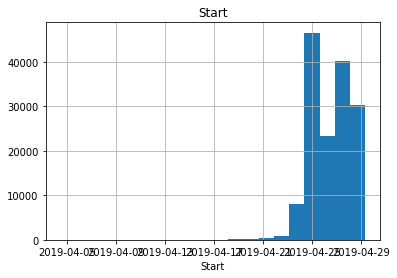

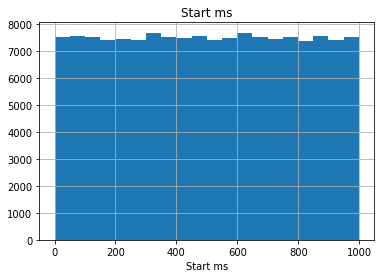

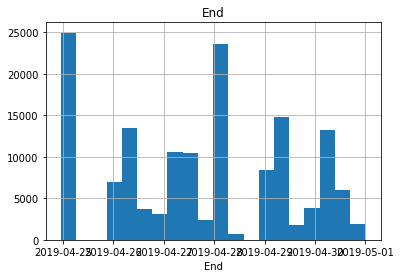

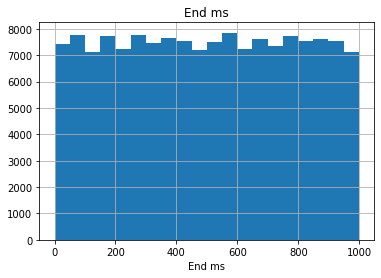

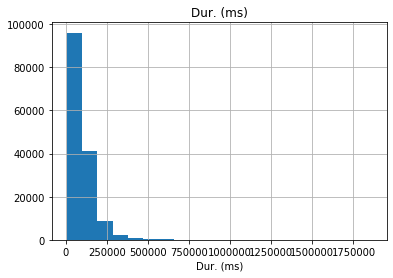

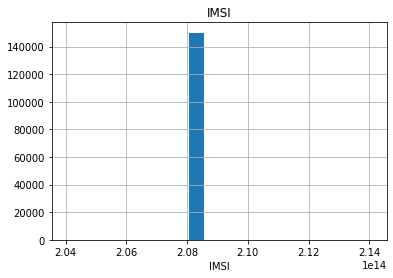

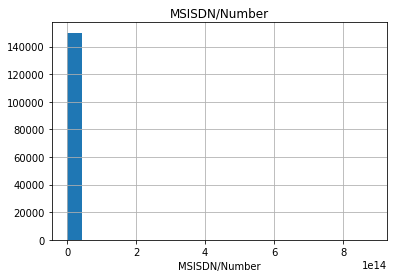

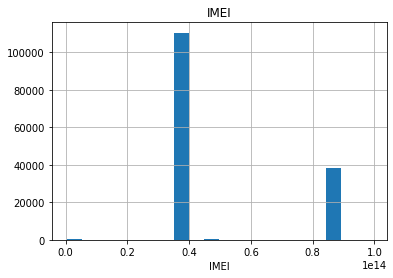

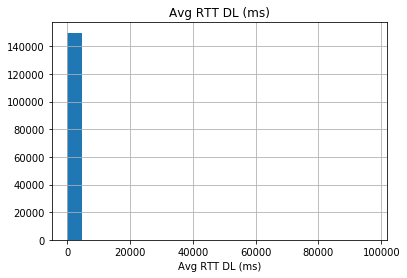

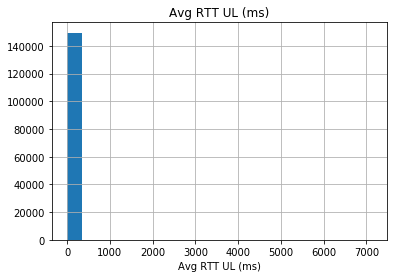

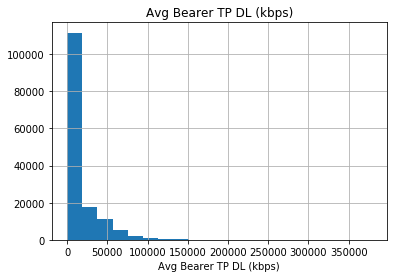

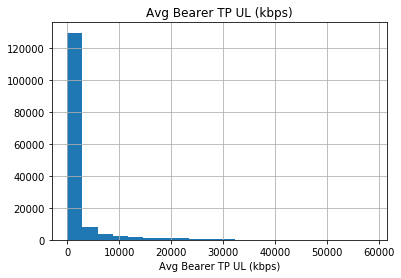

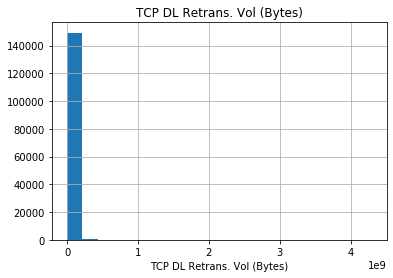

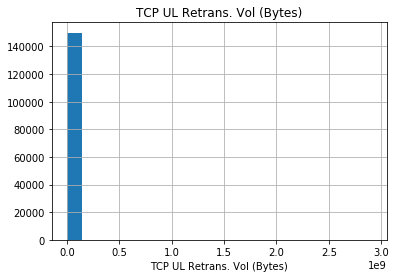

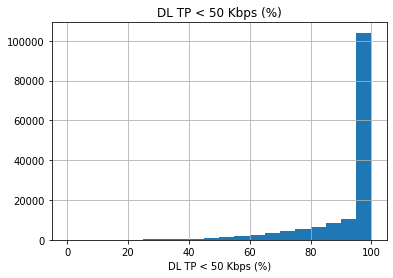

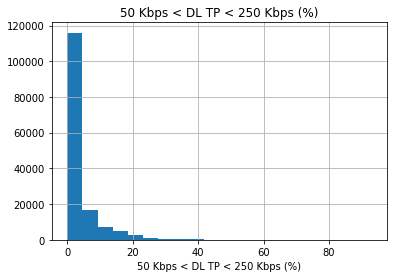

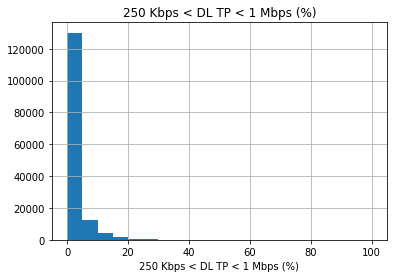

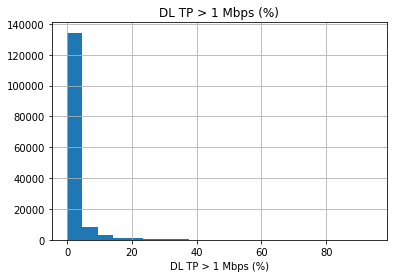

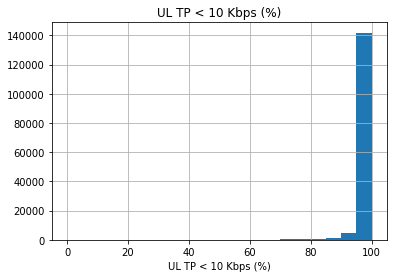

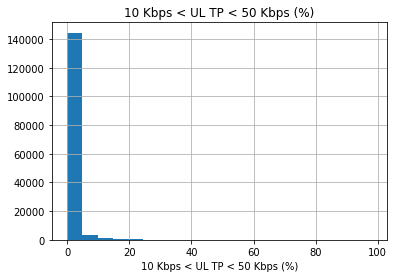

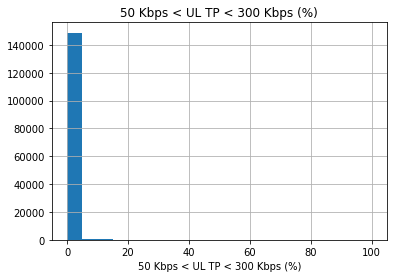

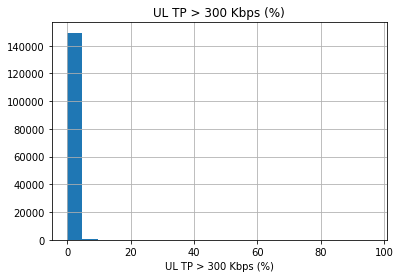

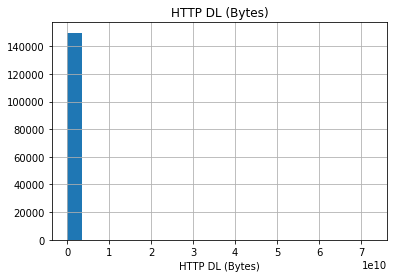

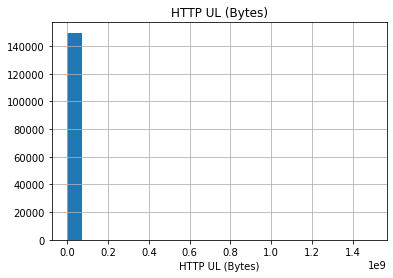

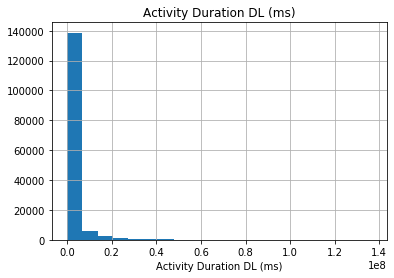

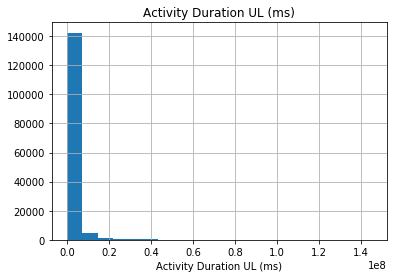

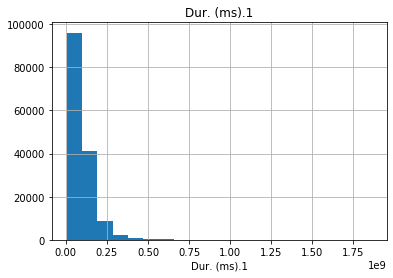

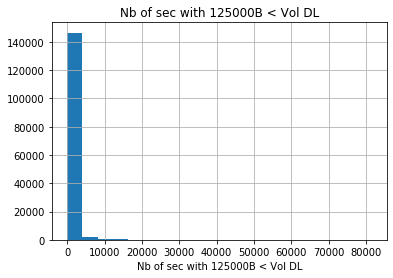

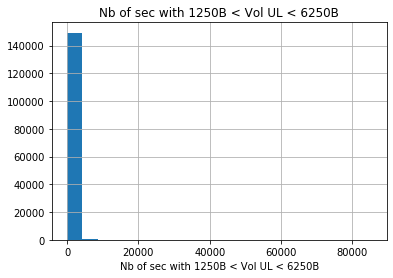

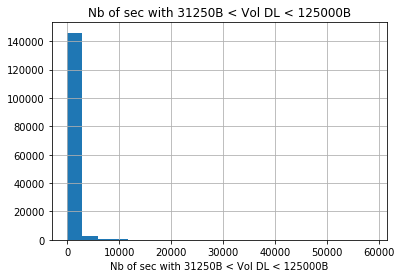

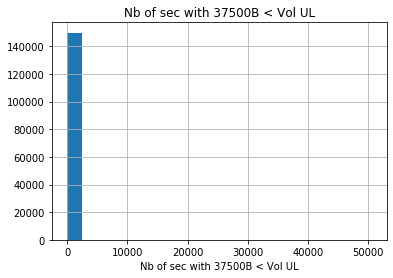

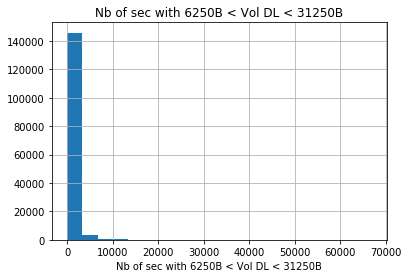

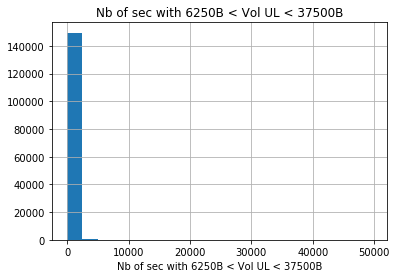

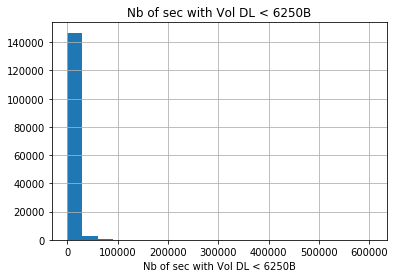

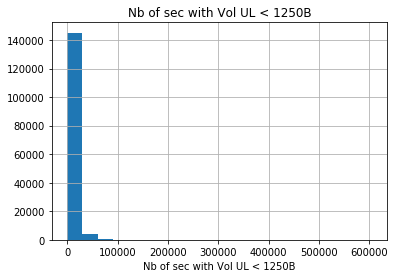

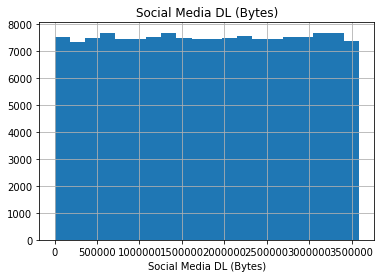

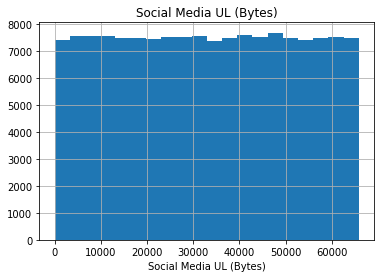

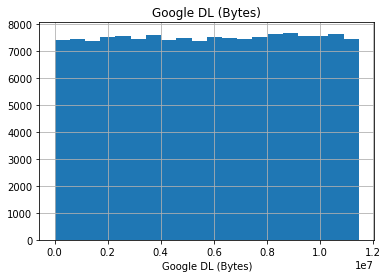

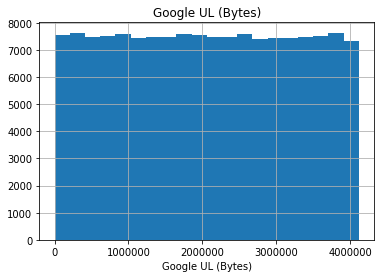

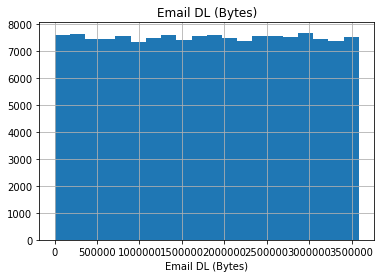

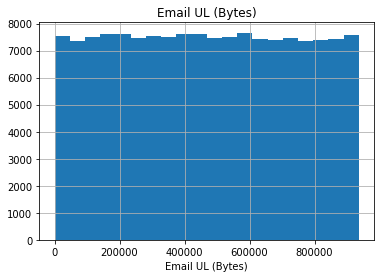

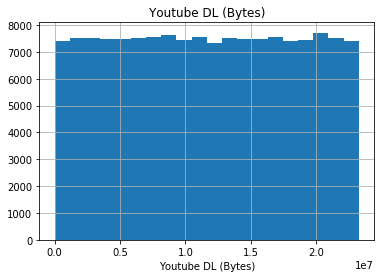

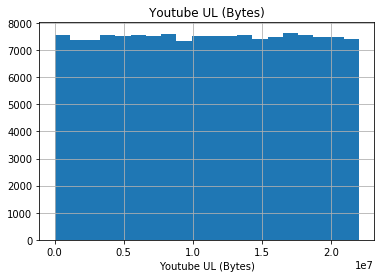

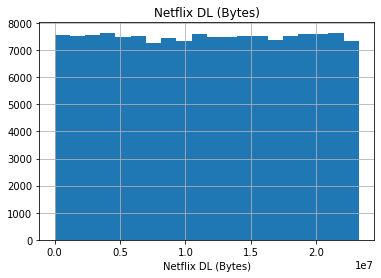

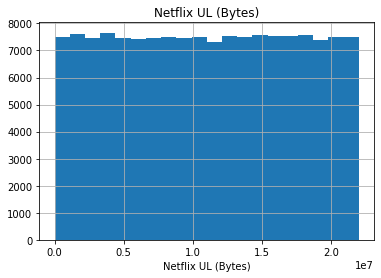

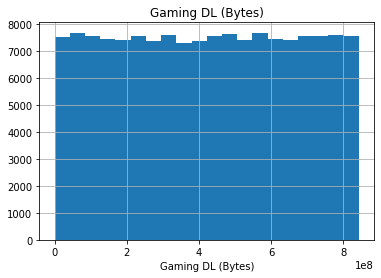

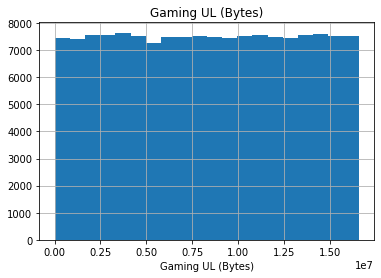

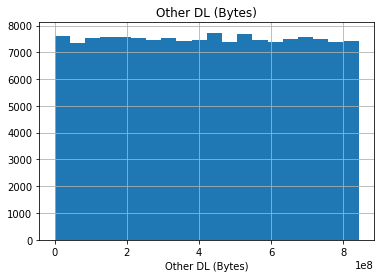

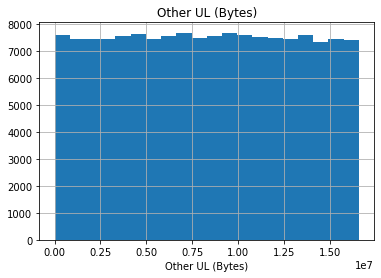

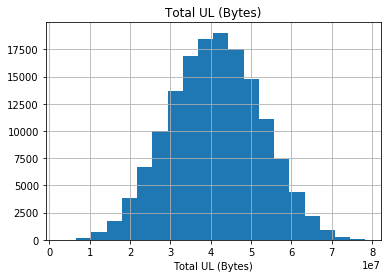

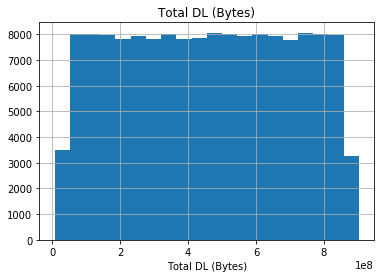

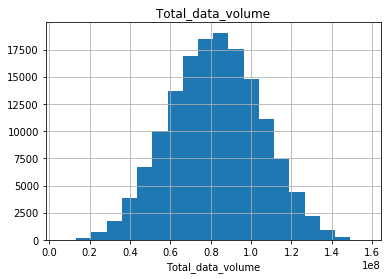

In [25]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(tele, var)

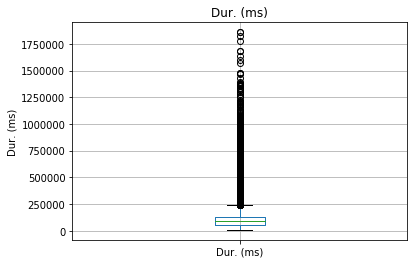

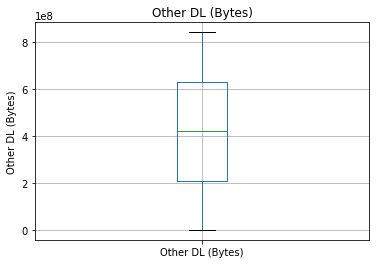

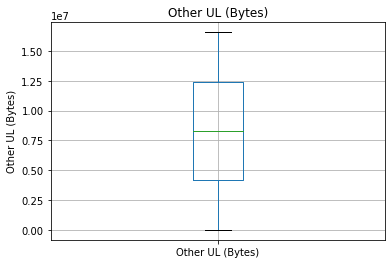

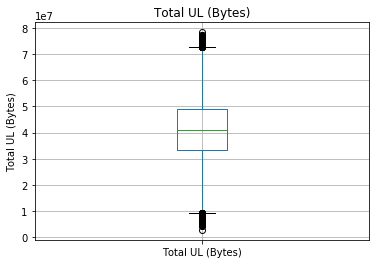

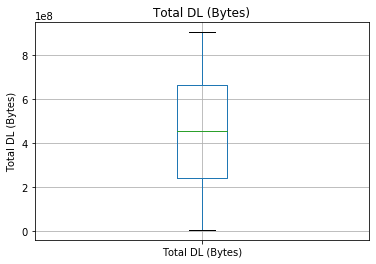

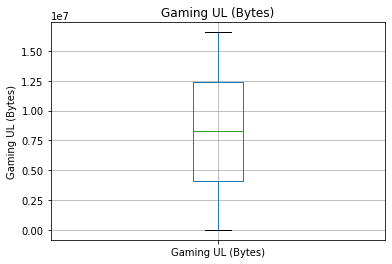

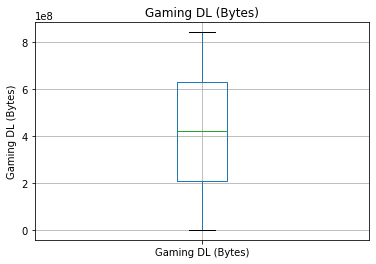

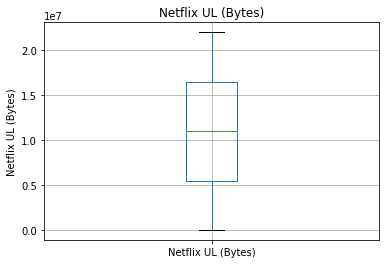

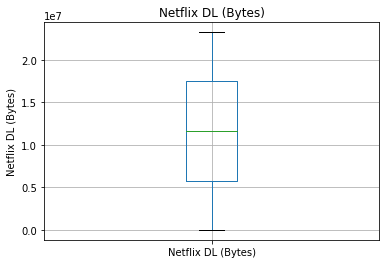

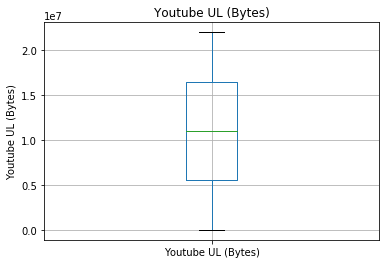

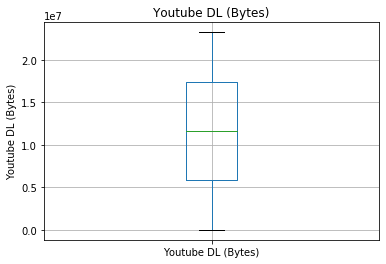

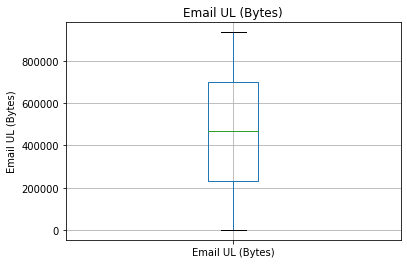

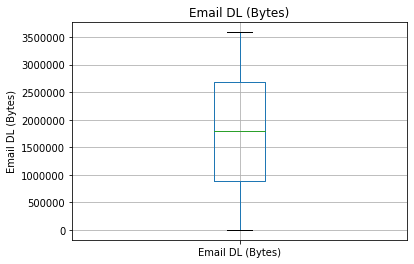

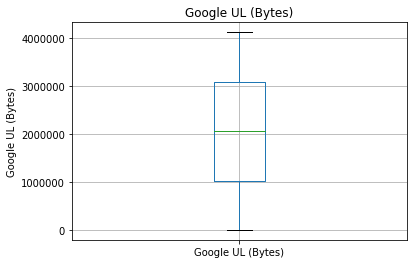

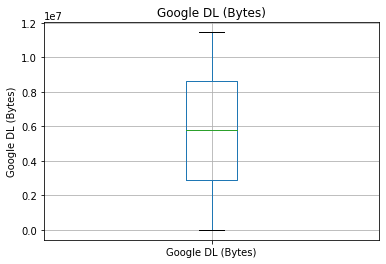

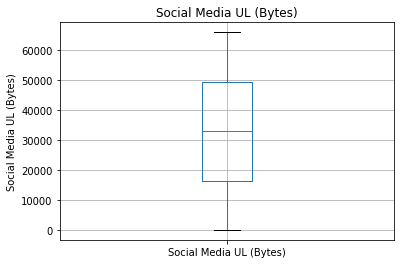

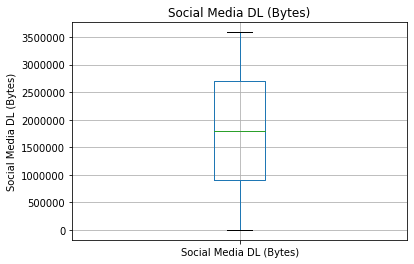

In [26]:
# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    
    df.boxplot(var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in ['Dur. (ms)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)','Gaming UL (Bytes)','Gaming DL (Bytes)','Netflix UL (Bytes)','Netflix DL (Bytes)','Youtube UL (Bytes)','Youtube DL (Bytes)','Email UL (Bytes)','Email DL (Bytes)','Google UL (Bytes)','Google DL (Bytes)','Social Media UL (Bytes)','Social Media DL (Bytes)',]:
    find_outliers(tele, var)


In [27]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['Total DL (Bytes)','Total UL (Bytes)'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Total DL (Bytes)')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(tele, var)

# Capping Outliers

In [25]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [26]:
# find limits Dur. (ms)
Dur_upper_limit, Dur_lower_limit = find_normal_boundaries(tele, 'Dur. (ms).1', 1.5)
Dur_upper_limit, Dur_lower_limit

(226165522.91119727, -16947311.819170594)

In [27]:
# find limits Total UL (Bytes)

Total_UL_upper_limit, Total_UL_lower_limit = find_normal_boundaries(tele, 'Total UL (Bytes)', 1.5)
Total_UL_upper_limit, Total_UL_lower_limit

(58035786.06414018, 24206626.520073153)

In [28]:
# Now let's replace the outliers by the maximum and minimum limit

tele['Dur. (ms).1']= np.where(tele['Dur. (ms).1'] > Dur_upper_limit, Dur_upper_limit,
                       np.where(tele['Dur. (ms).1'] < Dur_lower_limit, Dur_lower_limit, tele['Dur. (ms).1']))

In [29]:
# Now let's replace the outliers by the maximum and minimum limit

tele['Total UL (Bytes)']= np.where(tele['Total UL (Bytes)'] > Total_UL_upper_limit, Total_UL_upper_limit,
                       np.where(tele['Total UL (Bytes)'] < Total_UL_lower_limit, Total_UL_lower_limit, tele['Total UL (Bytes)']))

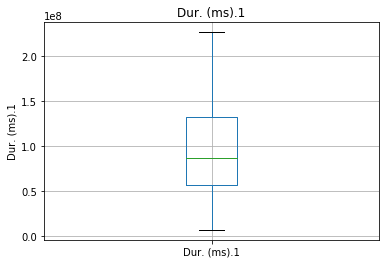

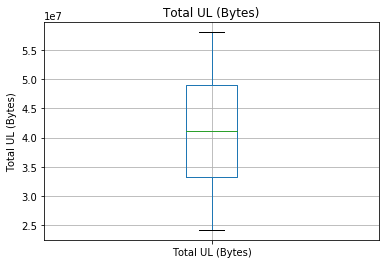

In [30]:
def find_outliers(df, var):
    
    df.boxplot(var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in ['Dur. (ms).1','Total UL (Bytes)']:
    find_outliers(tele, var)


# Bivariate Analysis

In [31]:
tele['Social Media'] = tele['Social Media DL (Bytes)'] + tele['Social Media UL (Bytes)']
tele['Youtube'] = tele['Youtube UL (Bytes)'] + tele['Youtube DL (Bytes)']
tele['Email'] = tele['Email UL (Bytes)'] + tele['Email DL (Bytes)']
tele['Netflix'] = tele['Netflix DL (Bytes)'] + tele['Netflix UL (Bytes)']
tele['Google'] = tele['Google DL (Bytes)'] + tele['Google UL (Bytes)']
tele['Gaming'] = tele['Gaming DL (Bytes)'] + tele['Gaming UL (Bytes)']
tele['Other'] = tele['Other DL (Bytes)'] + tele['Other UL (Bytes)']
tele['Total_data_volume'] = tele['Total UL (Bytes)'] + tele['Total UL (Bytes)']

In [ ]:
plt.bar(tele['Social Media'], tele['Total_data_volume'])
plt.title("A Bar plot of students and their scores")
plt.xlabel("Students in a Couse")
plt.ylabel("Scores")
plt.show();

In [ ]:
vars=['Gaming','Netflix','Youtube','Email','Google','Other','Social Media']
def analyse(df, var):
    df = df.copy()
    df.groupby(var)['Total_data_volume'].plot.bar()
    plt.title(var)
    plt.ylabel('Total UL (Bytes)' + 'Total DL (Bytes)')
    plt.show()
    
for var in vars:
    analyse(tele, var)

# Variable transfromation

In [32]:
# total session duration
tele['total duration']=tele['Dur. (ms).1'].sum()
tele['total duration'].head()

0    1.478466e+13
1    1.478466e+13
2    1.478466e+13
3    1.478466e+13
4    1.478466e+13
Name: total duration, dtype: float64

In [33]:
tele['total duration'] = pd.qcut(tele['total duration'],10,labels=False,duplicates='drop')
tele['total duration'].sort_values(ascending=False).head(5)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: total duration, dtype: float64

In [34]:
# 10 deciles for every 5 total durations
tele['total_data'] = pd.qcut(tele['Total_data_volume'],10,labels=False,duplicates='drop')
tele['total_data'].sort_values(ascending=False).head(5)

74999    9.0
8625     9.0
31596    9.0
94801    9.0
94800    9.0
Name: total_data, dtype: float64

In [35]:
#the total data (DL+UL) per decile class
usseg = pd.DataFrame(tele, columns = ['Total_data_volume', 'total_data' ])
usseg.sort_values(by=['total_data'],ascending = False).head(5)


,Total_data_volume,total_data
60655,1.141294e+08,9.0
118270,1.160716e+08,9.0
141378,1.160716e+08,9.0
141380,1.132856e+08,9.0
55444,1.160716e+08,9.0


# Correlation Analysis

In [32]:
#created a dataframe for the selected columns and doing correlation analysis
import pandas as pd
app_data = pd.DataFrame(tele,columns=['Social Media','Youtube','Email','Netflix','Google','Gaming','Other'])
corr_matrix = app_data.corr()

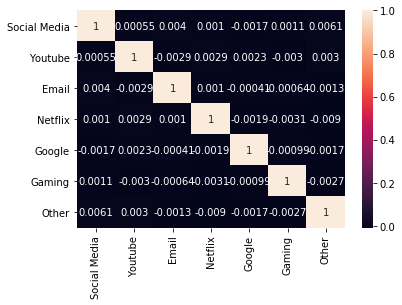

In [33]:
#visula represintation on the correlation
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Dimensionality Reduction

In [32]:

tele['Avg RTT'] = tele['Avg RTT DL (ms)'] + tele['Avg RTT UL (ms)']
tele['Avg Bearer TP'] = tele['Avg Bearer TP DL (kbps)'] + tele['Avg Bearer TP UL (kbps)']
tele['TCP'] = tele['TCP DL Retrans. Vol (Bytes)'] + tele['TCP UL Retrans. Vol (Bytes)']
tele['DL TP < 50 Kbps & UL TP < 10 Kbps'] = tele['DL TP < 50 Kbps (%)'] + tele['UL TP < 10 Kbps (%)']
tele['50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps'] = tele['50 Kbps < DL TP < 250 Kbps (%)'] + tele['10 Kbps < UL TP < 50 Kbps (%)']
tele['250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps'] = tele['250 Kbps < DL TP < 1 Mbps (%)'] + tele['50 Kbps < UL TP < 300 Kbps (%)']
tele['DL TP > 1 Mbps & UL TP > 300 Kbps'] = tele['DL TP > 1 Mbps (%)'] + tele['UL TP > 300 Kbps (%)']
tele['HTTP'] = tele['HTTP DL (Bytes)'] + tele['HTTP UL (Bytes)']
tele['Activity Duration'] = tele['Activity Duration DL (ms)'] + tele['Activity Duration UL (ms)']
tele['Nb of sec with 125000B < Vol DL & Nb of sec with 37500B < Vol UL'] = tele['Nb of sec with 125000B < Vol DL'] + tele['Nb of sec with 37500B < Vol UL']
tele['Nb of sec with 1250B < Vol UL < 6250B & Nb of sec with 31250B < Vol DL < 125000B'] = tele['Nb of sec with 1250B < Vol UL < 6250B'] + tele['Nb of sec with 31250B < Vol DL < 125000B']
tele['Nb of sec with 6250B < Vol DL < 31250B & Nb of sec with 6250B < Vol UL < 37500B'] = tele['Nb of sec with 6250B < Vol DL < 31250B'] + tele['Nb of sec with 6250B < Vol UL < 37500B']
tele['Nb of sec with Vol DL < 6250B & Nb of sec with Vol UL < 1250B'] = tele['Nb of sec with Vol DL < 6250B'] + tele['Nb of sec with Vol UL < 1250B']


In [35]:
dim=pd.DataFrame(tele,columns=['IMSI','MSISDN/Number','IMEI','Last Location Name','Avg RTT','Avg Bearer TP','TCP','DL TP < 50 Kbps & UL TP < 10 Kbps','50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps','250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps','DL TP > 1 Mbps & UL TP > 300 Kbps','HTTP','Activity Duration','Dur. (ms).1','Handset Manufacturer','Handset Type','Nb of sec with 125000B < Vol DL & Nb of sec with 37500B < Vol UL','Nb of sec with 1250B < Vol UL < 6250B & Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 6250B < Vol DL < 31250B & Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B & Nb of sec with Vol UL < 1250B','Gaming','Netflix','Youtube','Email','Google','Other','Social Media','Total_data_volume'])
dim

,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT,Avg Bearer TP,TCP,DL TP < 50 Kbps & UL TP < 10 Kbps,50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps,250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps,...,Nb of sec with 6250B < Vol DL < 31250B & Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B & Nb of sec with Vol UL < 1250B,Gaming,Netflix,Youtube,Email,Google,Other,Social Media,Total_data_volume
0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,47.000000,67.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,427.000000,2.924265e+08,1.785519e+07,1.835594e+07,3.701304e+06,2.905912e+06,1.805588e+08,1.570185e+06,7.349948e+07
1,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,70.000000,42.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,1993.000000,6.099208e+08,3.556554e+07,3.935912e+07,9.373850e+05,4.414096e+06,5.419594e+08,1.933278e+06,1.076008e+08
2,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,127.458589,15.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,1446.000000,2.299803e+08,2.375120e+07,3.442524e+07,3.363124e+06,1.022912e+07,4.149084e+08,1.726277e+06,5.576728e+07
3,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,127.458589,88.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,224.000000,8.103879e+08,1.509259e+07,3.653476e+07,2.070983e+06,1.181176e+07,7.618372e+08,6.574930e+05,8.664844e+07
4,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,127.458589,15.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,1211.000000,5.312370e+08,1.753980e+07,3.422225e+07,2.110349e+06,7.748843e+06,5.646198e+08,9.127880e+05,7.708563e+07
5,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,127.458589,124.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,230.000000,7.234615e+08,1.388181e+07,2.394403e+07,2.902410e+06,1.293413e+07,6.594143e+08,3.200014e+06,6.061551e+07
6,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,107.000000,60.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,688.000000,5.888116e+07,3.121277e+07,9.120760e+06,2.090979e+06,4.906872e+06,8.143033e+08,1.624991e+06,9.585049e+07
7,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,57.000000,4114.0,7.791787e+05,198.000000,0.000000,0.000000,...,143.304812,1374.000000,7.650558e+08,1.893370e+07,3.192497e+07,3.500104e+06,3.872713e+06,5.453165e+08,3.161403e+06,1.160716e+08
8,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,127.458589,95.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,1620.000000,8.282196e+08,1.905444e+07,2.929751e+07,3.380069e+06,8.902099e+06,1.876695e+08,3.726250e+05,8.472629e+07
9,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,104.000000,6380.0,3.238627e+06,169.000000,26.000000,2.000000,...,1669.000000,10765.000000,8.129464e+08,1.318535e+07,2.291154e+07,7.660460e+05,8.778341e+06,7.767125e+07,1.585413e+06,4.841325e+07


In [36]:
dim.dropna()

,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT,Avg Bearer TP,TCP,DL TP < 50 Kbps & UL TP < 10 Kbps,50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps,250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps,...,Nb of sec with 6250B < Vol DL < 31250B & Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B & Nb of sec with Vol UL < 1250B,Gaming,Netflix,Youtube,Email,Google,Other,Social Media,Total_data_volume
0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,47.000000,67.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,427.000000,292426453.0,17855187.0,18355943.0,3701304.0,2905912.0,180558843.0,1570185.0,7.349948e+07
1,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,70.000000,42.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,1993.000000,609920783.0,35565545.0,39359124.0,937385.0,4414096.0,541959383.0,1933278.0,1.076008e+08
2,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,127.458589,15.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,1446.000000,229980251.0,23751202.0,34425237.0,3363124.0,10229119.0,414908351.0,1726277.0,5.576728e+07
3,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,127.458589,88.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,224.000000,810387875.0,15092588.0,36534765.0,2070983.0,11811761.0,761837216.0,657493.0,8.664844e+07
4,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,127.458589,15.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,1211.000000,531237049.0,17539799.0,34222253.0,2110349.0,7748843.0,564619822.0,912788.0,7.708563e+07
5,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,127.458589,124.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,230.000000,723461512.0,13881809.0,23944031.0,2902410.0,12934133.0,659414334.0,3200014.0,6.061551e+07
6,2.082014e+14,3.366537e+10,8.676270e+13,9164567010589190,107.000000,60.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,688.000000,58881157.0,31212766.0,9120760.0,2090979.0,4906872.0,814303325.0,1624991.0,9.585049e+07
7,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,57.000000,4114.0,7.791787e+05,198.000000,0.000000,0.000000,...,143.304812,1374.000000,765055811.0,18933702.0,31924969.0,3500104.0,3872713.0,545316477.0,3161403.0,1.160716e+08
8,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,127.458589,95.0,2.156957e+07,200.000000,0.000000,0.000000,...,1106.769567,1620.000000,828219634.0,19054441.0,29297508.0,3380069.0,8902099.0,187669517.0,372625.0,8.472629e+07
9,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,104.000000,6380.0,3.238627e+06,169.000000,26.000000,2.000000,...,1669.000000,10765.000000,812946425.0,13185350.0,22911539.0,766046.0,8778341.0,77671250.0,1585413.0,4.841325e+07


In [37]:
dim.dtypes

IMSI                                                                                float64
MSISDN/Number                                                                       float64
IMEI                                                                                float64
Last Location Name                                                                   object
Avg RTT                                                                             float64
Avg Bearer TP                                                                       float64
TCP                                                                                 float64
DL TP < 50 Kbps & UL TP < 10 Kbps                                                   float64
50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps                              float64
250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps                              float64
DL TP > 1 Mbps & UL TP > 300 Kbps                                               

In [38]:
#lets divide the independent and dependent variables
X=dim.iloc[:,0:27]
y=dim.iloc[:,27]

In [39]:
#list categorical variables
dim_cat = dim.select_dtypes(exclude='number')

dim_cat.head()

,Last Location Name,Handset Manufacturer,Handset Type
0,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F
1,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530)
2,D42335A,Samsung,Samsung Galaxy A8 (2018)
3,T21824A,undefined,undefined
4,D88865A,Samsung,Samsung Sm-G390F


In [40]:
#get the column number of the categorical variables
dim.columns.get_loc("Last Location Name")

3

In [41]:
#get the column number of the categorical variables
dim.columns.get_loc("Handset Manufacturer")

14

In [42]:
#get the column number of the categorical variables
dim.columns.get_loc("Handset Type")

15

In [43]:
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
ohe_enc = OneHotCategoricalEncoder(
    top_categories=20,  # you can change this value to select more or less variables
    # we can select which variables to encode
    variables=['Last Location Name', 'Handset Manufacturer', 'Handset Type'],
    drop_last=False)

ohe_enc.fit(X)

OneHotCategoricalEncoder(drop_last=False, top_categories=20,
                         variables=['Last Location Name',
                                    'Handset Manufacturer', 'Handset Type'])

In [44]:
# in the encoder dict we can observe each of the top categories
# selected for each of the variables

ohe_enc.encoder_dict_

{'Last Location Name': ['Missing',
  'D41377B',
  'D17085A',
  'D72396C',
  'D73604C',
  9164566985995010,
  'D11119B',
  9164567013049100,
  'L41377B',
  'D11002B',
  'T11002B',
  'L70357B',
  'T88711B',
  'D78888C',
  'D92928A',
  9164567010589190,
  'D88759A',
  'L11011A',
  9164566995485180,
  'D92937A'],
 'Handset Manufacturer': ['Apple',
  'Samsung',
  'Huawei',
  'undefined',
  'Sony Mobile Communications Ab',
  'Wiko Global Sasu',
  'Missing',
  'Xiaomi Communications Co Ltd',
  'Oneplus Technology (Shenzhen) Co Ltd',
  'Asustek',
  'Lenovo',
  'Tcl Communication Ltd',
  'Crosscall',
  'Zte',
  'Microsoft Mobile Oy',
  'Htc',
  'Hmd Global Oy',
  'Sony Mobile Communications AB',
  'Lg',
  'Nokia'],
 'Handset Type': ['Huawei B528S-23A',
  'Apple iPhone 6S (A1688)',
  'Apple iPhone 6 (A1586)',
  'undefined',
  'Apple iPhone 7 (A1778)',
  'Apple iPhone Se (A1723)',
  'Apple iPhone 8 (A1905)',
  'Apple iPhone Xr (A2105)',
  'Samsung Galaxy S8 (Sm-G950F)',
  'Apple iPhone X (A1901)'

In [45]:
# this is the list of variables that the encoder will transform

ohe_enc.variables

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [46]:
X = ohe_enc.transform(X)
X.head()

,IMSI,MSISDN/Number,IMEI,Avg RTT,Avg Bearer TP,TCP,DL TP < 50 Kbps & UL TP < 10 Kbps,50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps,250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps,DL TP > 1 Mbps & UL TP > 300 Kbps,...,Handset Type_Samsung Galaxy A5 Sm-A520F,Handset Type_Samsung Galaxy J5 (Sm-J530),Handset Type_Samsung Galaxy J3 (Sm-J330),Handset Type_Samsung Galaxy S7 (Sm-G930X),Handset Type_Apple iPhone 8 Plus (A1897),Handset Type_Samsung Galaxy A8 (2018),Handset Type_Apple iPhone 6S Plus (A1687),Handset Type_Huawei E5180,Handset Type_Huawei P20 Lite Huawei Nova 3E,Handset Type_Samsung Galaxy S7 Edge (Sm-G935X)
0,2.082014e+14,3.366496e+10,3.552121e+13,47.000000,67.0,2.156957e+07,200.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,2.082019e+14,3.368185e+10,3.579401e+13,70.000000,42.0,2.156957e+07,200.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,2.082003e+14,3.376063e+10,3.528151e+13,127.458589,15.0,2.156957e+07,200.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,2.082014e+14,3.375034e+10,3.535661e+13,127.458589,88.0,2.156957e+07,200.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.082014e+14,3.369980e+10,3.540701e+13,127.458589,15.0,2.156957e+07,200.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:

np.any(np.isnan(X))

True

In [48]:
np.all(np.isfinite(X))

False

In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [54]:
# let's first learn the mean from the train set

means = X_train.mean(axis=0)
means

IMSI                                                                                2.082017e+14
MSISDN/Number                                                                       3.656713e+10
IMEI                                                                                4.845377e+13
Avg RTT                                                                             1.278864e+02
Avg Bearer TP                                                                       1.501945e+04
TCP                                                                                 2.140899e+07
DL TP < 50 Kbps & UL TP < 10 Kbps                                                   1.913938e+02
50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps                              3.839846e+00
250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps                              1.856933e+00
DL TP > 1 Mbps & UL TP > 300 Kbps                                                   1.686237e+00
HTTP                          

In [55]:
# let's now learn the min and max values, and the value range 
# from the train set

ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

IMSI                                                                                9.993493e+12
MSISDN/Number                                                                       3.369664e+14
IMEI                                                                                9.856119e+13
Avg RTT                                                                             9.692400e+04
Avg Bearer TP                                                                       3.822620e+05
TCP                                                                                 4.344116e+09
DL TP < 50 Kbps & UL TP < 10 Kbps                                                   1.810000e+02
50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps                              1.770000e+02
250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps                              1.000000e+02
DL TP > 1 Mbps & UL TP > 300 Kbps                                                   1.350000e+02
HTTP                          

In [56]:
# now we are ready to perform mean normalisation:

X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [57]:
# let's have a look at the original training dataset: mean and min, max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train.describe(), 1)

,IMSI,MSISDN/Number,IMEI,Avg RTT,Avg Bearer TP,TCP,DL TP < 50 Kbps & UL TP < 10 Kbps,50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps,250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps,DL TP > 1 Mbps & UL TP > 300 Kbps,...,Handset Type_Samsung Galaxy A5 Sm-A520F,Handset Type_Samsung Galaxy J5 (Sm-J530),Handset Type_Samsung Galaxy J3 (Sm-J330),Handset Type_Samsung Galaxy S7 (Sm-G930X),Handset Type_Apple iPhone 8 Plus (A1897),Handset Type_Samsung Galaxy A8 (2018),Handset Type_Apple iPhone 6S Plus (A1687),Handset Type_Huawei E5180,Handset Type_Huawei P20 Lite Huawei Nova 3E,Handset Type_Samsung Galaxy S7 Edge (Sm-G935X)
count,1.200000e+05,1.200000e+05,1.200000e+05,120000.0,119999.0,1.200000e+05,120000.0,120000.0,120000.0,120000.0,...,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0
mean,2.082017e+14,3.656713e+10,4.845377e+13,127.9,15019.4,2.140899e+07,191.4,3.8,1.9,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.075337e+10,9.727810e+11,2.235885e+13,591.1,26688.8,1.161200e+08,15.3,7.7,4.5,5.1,...,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1
min,2.040808e+14,3.360100e+10,4.400152e+11,0.0,0.0,8.600000e+01,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.082014e+14,3.365140e+10,3.546261e+13,40.0,90.0,1.494052e+06,188.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.082015e+14,3.366379e+10,3.572251e+13,67.0,125.0,2.156957e+07,200.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2.082018e+14,3.368472e+10,8.611970e+13,127.5,22344.5,2.156957e+07,200.0,5.0,1.7,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.140743e+14,3.370000e+14,9.900120e+13,96924.0,382262.0,4.344116e+09,200.0,177.0,100.0,135.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [58]:
# let's have a look at the scaled training dataset:  mean and min, max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.describe(), 1)

,IMSI,MSISDN/Number,IMEI,Avg RTT,Avg Bearer TP,TCP,DL TP < 50 Kbps & UL TP < 10 Kbps,50 Kbps < DL TP < 250 Kbps & 10 Kbps < UL TP < 50 Kbps,250 Kbps < DL TP < 1 Mbps & 50 Kbps < UL TP < 300 Kbps,DL TP > 1 Mbps & UL TP > 300 Kbps,...,Handset Type_Samsung Galaxy A5 Sm-A520F,Handset Type_Samsung Galaxy J5 (Sm-J530),Handset Type_Samsung Galaxy J3 (Sm-J330),Handset Type_Samsung Galaxy S7 (Sm-G930X),Handset Type_Apple iPhone 8 Plus (A1897),Handset Type_Samsung Galaxy A8 (2018),Handset Type_Apple iPhone 6S Plus (A1687),Handset Type_Huawei E5180,Handset Type_Huawei P20 Lite Huawei Nova 3E,Handset Type_Samsung Galaxy S7 Edge (Sm-G935X)
count,120000.0,120000.0,120000.0,120000.0,119999.0,120000.0,120000.0,120000.0,120000.0,120000.0,...,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0,120000.0
mean,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
std,0.0,0.0,0.2,0.0,0.1,0.0,0.1,0.0,0.0,0.0,...,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1
min,-0.4,-0.0,-0.5,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
25%,-0.0,-0.0,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
50%,-0.0,-0.0,-0.1,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,0.0,-0.0,0.4,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
max,0.6,1.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [99]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Task 2

In [50]:
#sessions frequency 
sessions_frequency=tele.groupby('MSISDN/Number')['Bearer Id'].count()
sessions_frequency

MSISDN/Number
3.360100e+10       1
3.360100e+10       1
3.360100e+10       1
3.360101e+10       1
3.360101e+10       2
3.360101e+10       2
3.360101e+10       2
3.360101e+10       1
3.360101e+10       2
3.360102e+10       1
3.360102e+10       1
3.360102e+10       1
3.360102e+10       1
3.360102e+10       1
3.360103e+10       1
3.360103e+10       1
3.360103e+10       1
3.360103e+10       1
3.360103e+10       1
3.360103e+10       1
3.360103e+10       2
3.360103e+10       2
3.360104e+10       1
3.360104e+10       1
3.360104e+10       1
3.360104e+10       1
3.360104e+10       1
3.360104e+10       1
3.360105e+10       1
3.360105e+10       3
                ... 
3.378980e+10       1
3.378981e+10       1
3.378983e+10       1
3.378983e+10       2
3.378984e+10       2
3.378984e+10       1
3.378986e+10       1
3.378988e+10       1
3.378988e+10       1
3.378988e+10       1
3.378988e+10       1
3.378988e+10       4
3.378989e+10       1
3.378989e+10       1
3.378991e+10       1
3.378991e+10       1

In [51]:
#the duration of the session  
session_duration=tele.groupby('MSISDN/Number')['Dur. (ms).1'].sum()
session_duration

MSISDN/Number
3.360100e+10    1.167201e+08
3.360100e+10    1.812310e+08
3.360100e+10    1.349694e+08
3.360101e+10    4.987802e+07
3.360101e+10    3.710445e+07
3.360101e+10    2.539831e+08
3.360101e+10    1.283605e+08
3.360101e+10    8.639998e+07
3.360101e+10    3.820155e+08
3.360102e+10    1.248548e+08
3.360102e+10    2.261655e+08
3.360102e+10    3.841620e+07
3.360102e+10    9.736320e+07
3.360102e+10    2.261655e+08
3.360103e+10    1.699798e+08
3.360103e+10    3.454409e+07
3.360103e+10    9.175322e+07
3.360103e+10    5.573065e+07
3.360103e+10    2.178525e+07
3.360103e+10    7.489349e+07
3.360103e+10    7.367540e+07
3.360103e+10    2.267535e+08
3.360104e+10    1.356645e+08
3.360104e+10    1.003711e+08
3.360104e+10    9.833739e+07
3.360104e+10    7.909820e+07
3.360104e+10    8.284474e+07
3.360104e+10    2.261655e+08
3.360105e+10    3.177899e+07
3.360105e+10    1.621784e+08
                    ...     
3.378980e+10    1.602029e+08
3.378981e+10    1.245384e+08
3.378983e+10    1.392927e+08


In [53]:
#the sessions total traffic (download and upload (bytes))
tele['total_data_volume']=tele['Total UL (Bytes)'] + tele['Total DL (Bytes)']
total_traffic= tele.groupby('MSISDN/Number')['total_data_volume'].sum()

0    345629377.0
1    707185356.0
2    307690973.0
3    889352748.0
4    607681403.0
Name: total_data_volume, dtype: float64

In [54]:

new_tele=pd.DataFrame(tele,columns=['MSISDN/Number','Bearer Id','Dur. (ms).1','total_data_volume'])
new_tele.head()

,MSISDN/Number,Bearer Id,Dur. (ms).1,total_data_volume
0,3.366496e+10,13114483460844900352,2.261655e+08,345629377.0
1,3.368185e+10,13114483482878900224,2.261655e+08,707185356.0
2,3.376063e+10,13114483484080500736,2.261655e+08,307690973.0
3,3.375034e+10,13114483485442799616,2.261655e+08,889352748.0
4,3.369980e+10,13114483499480700928,2.261655e+08,607681403.0


In [55]:
new_tele.fillna(new_tele.mean())

,MSISDN/Number,Bearer Id,Dur. (ms).1,total_data_volume
0,3.366496e+10,13114483460844900352,2.261655e+08,3.456294e+08
1,3.368185e+10,13114483482878900224,2.261655e+08,7.071854e+08
2,3.376063e+10,13114483484080500736,2.261655e+08,3.076910e+08
3,3.375034e+10,13114483485442799616,2.261655e+08,8.893527e+08
4,3.369980e+10,13114483499480700928,2.261655e+08,6.076814e+08
5,3.366819e+10,13114483499779198976,2.261655e+08,7.847600e+08
6,3.366537e+10,13114483501243799552,2.261655e+08,1.184873e+08
7,3.376349e+10,13042425910865399808,2.261655e+08,8.333861e+08
8,3.369874e+10,13114483506432499712,2.261655e+08,9.039754e+08
9,3.365922e+10,13042425914669299712,2.261655e+08,8.747770e+08


In [56]:
new_tele.groupby(['MSISDN/Number']).size().reset_index(name='sessions_frequency')

,MSISDN/Number,sessions_frequency
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2
5,3.360101e+10,2
6,3.360101e+10,2
7,3.360101e+10,1
8,3.360101e+10,2
9,3.360102e+10,1


In [365]:

gb = new_tele.groupby(['MSISDN/Number']) 
counts = gb.size().to_frame(name='sessions_frequency')
tele_df=pd.DataFrame((counts.join(gb.agg({'Dur. (ms).1': 'sum'}).rename(columns={'Dur. (ms).1': 'session_duration'})).join(gb.agg({'total_data_volume': 'sum'}).rename(columns={'total_data_volume': 'total_traffic'})).reset_index()))

In [366]:
tele_df.head()

,MSISDN/Number,sessions_frequency,session_duration,total_traffic
0,3.360100e+10,1,116720140.0,8.786906e+08
1,3.360100e+10,1,181230963.0,1.568596e+08
2,3.360100e+10,1,134969374.0,5.959665e+08
3,3.360101e+10,1,49878024.0,4.261998e+08
4,3.360101e+10,2,37104453.0,1.457411e+09


In [367]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
tele_df = sc.fit_transform(tele_df)
tele_df

array([[-3.98481361e-03, -1.20343560e-01, -8.83746899e-02,
         1.07796508e-01],
       [-3.98481360e-03, -1.20343560e-01,  1.75088012e-01,
        -3.17953825e-01],
       [-3.98481334e-03, -1.20343560e-01, -1.38446765e-02,
        -5.89598207e-02],
       ...,
       [ 1.09085281e+00, -1.20343560e-01,  3.58601104e-01,
        -2.73561417e-01],
       [ 1.16617756e+02, -1.20343560e-01,  3.58601104e-01,
        -5.87702873e-02],
       [ 3.05375890e+02, -1.20343560e-01,  3.58601104e-01,
        -3.29824696e-01]])

In [368]:
X=tele_df[:,[1,2,3]]
X

array([[-0.12034356, -0.08837469,  0.10779651],
       [-0.12034356,  0.17508801, -0.31795382],
       [-0.12034356, -0.01384468, -0.05895982],
       ...,
       [-0.12034356,  0.3586011 , -0.27356142],
       [-0.12034356,  0.3586011 , -0.05877029],
       [-0.12034356,  0.3586011 , -0.3298247 ]])

In [369]:
#Applying k-means in the mall dataset
from sklearn.cluster import KMeans
kmeans=kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [370]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

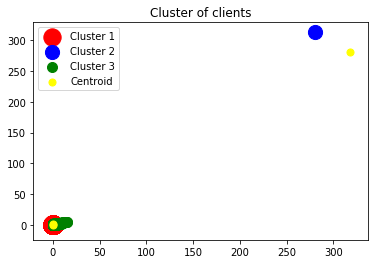

In [374]:
#Visualising the cluster
plt.scatter(X[y_kmeans==0,1],X[y_kmeans==0,2],s=300,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,1],X[y_kmeans==1,2],s=200,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,1],X[y_kmeans==2,2],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroid')
plt.title('Cluster of clients')
plt.legend()
plt.show()

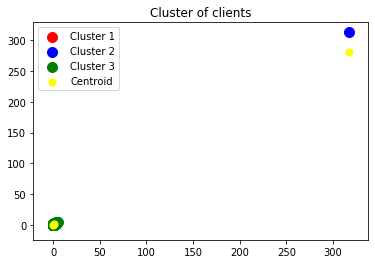

In [372]:
#Visualising the cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,2],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,2],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,2],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroid')
plt.title('Cluster of clients')
plt.legend()
plt.show()

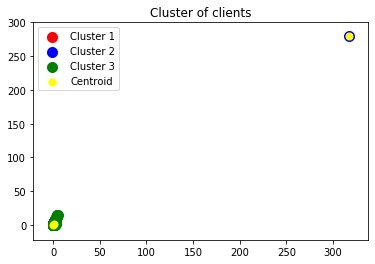

In [373]:
#Visualising the cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroid')
plt.title('Cluster of clients')
plt.legend()
plt.show()

In [124]:
for i in [0,1,2]:
    print("Minimum:",X[y_kmeans==i,i].min())
    print("Max:",X[y_kmeans==i,i].max())
    print("Avg:",X[y_kmeans==i,i].mean())

Minimum: -0.1203435604901219
Max: 0.7738399999094441
Avg: -0.06457263654336774
Minimum: 280.3128700950679
Max: 280.3128700950679
Avg: 280.3128700950679
Minimum: -0.3044949820952398
Max: 4.811552120030292
Avg: 0.5015900206401701


In [125]:
for i in [0,2]:
    print("Minimum:",X[y_kmeans==i,1].min())
    print("Max:",X[y_kmeans==i,1].max())
    print("Avg:",X[y_kmeans==i,1].mean())

Minimum: -0.5358886297919285
Max: 0.7114589462154655
Avg: -0.12922658264914788
Minimum: -0.2156483322515202
Max: 15.09840237062103
Avg: 1.0078939389497659


In [126]:
for i in [0,1]:
    print("Minimum:",X[y_kmeans==i,2].min())
    print("Max:",X[y_kmeans==i,2].max())
    print("Avg:",X[y_kmeans==i,2].mean())

Minimum: -0.3908595940196104
Max: 1.0282028314484097
Avg: -0.06613691842489602
Minimum: 312.8791611536073
Max: 312.8791611536073
Avg: 312.8791611536073


In [129]:
tele['Social Media'] = tele['Social Media DL (Bytes)'] + tele['Social Media UL (Bytes)']
tele['Youtube'] = tele['Youtube UL (Bytes)'] + tele['Youtube DL (Bytes)']
tele['Email'] = tele['Email UL (Bytes)'] + tele['Email DL (Bytes)']
tele['Netflix'] = tele['Netflix DL (Bytes)'] + tele['Netflix UL (Bytes)']
tele['Google'] = tele['Google DL (Bytes)'] + tele['Google UL (Bytes)']
tele['Gaming'] = tele['Gaming DL (Bytes)'] + tele['Gaming UL (Bytes)']
tele['Other'] = tele['Other DL (Bytes)'] + tele['Other UL (Bytes)']
tele['Total_data_volume'] = tele['Total UL (Bytes)'] + tele['Total UL (Bytes)']

In [131]:
tele_df=pd.DataFrame(tele,columns=['MSISDN/Number','Social Media','Youtube','Email','Netflix','Google','Gaming','Other','Total_data_volume'])
tele_df.head()

,MSISDN/Number,Social Media,Youtube,Email,Netflix,Google,Gaming,Other,Total_data_volume
0,3.366496e+10,1570185.0,18355943.0,3701304.0,17855187.0,2905912.0,292426453.0,180558843.0,73499482.0
1,3.368185e+10,1933278.0,39359124.0,937385.0,35565545.0,4414096.0,609920783.0,541959383.0,107600782.0
2,3.376063e+10,1726277.0,34425237.0,3363124.0,23751202.0,10229119.0,229980251.0,414908351.0,55767276.0
3,3.375034e+10,657493.0,36534765.0,2070983.0,15092588.0,11811761.0,810387875.0,761837216.0,86648436.0
4,3.369980e+10,912788.0,34222253.0,2110349.0,17539799.0,7748843.0,531237049.0,564619822.0,77085628.0


In [134]:

gb = tele_df.groupby(['MSISDN/Number']) 
sums = gb.size().to_frame(name='sum')
tele_df=pd.DataFrame((sums.join(gb.agg({'Social Media': 'sum'}).rename(columns={'Social Media': 'Social Media sum'})).join(gb.agg({'Youtube': 'sum'}).rename(columns={'Youtube': 'Youtube sum'})).join(gb.agg({'Email': 'sum'}).rename(columns={'Email': 'Email sum'})).join(gb.agg({'Netflix': 'sum'}).rename(columns={'Netflix': 'Netflix sum'})).join(gb.agg({'Google': 'sum'}).rename(columns={'Google': 'Google sum'})).join(gb.agg({'Gaming': 'sum'}).rename(columns={'Gaming': 'Gaming sum'})).join(gb.agg({'Other': 'sum'}).rename(columns={'Other': 'Other sum'})).join(gb.agg({'Total_data_volume': 'sum'}).rename(columns={'Total_data_volume': 'total_traffic'})).reset_index()))

In [135]:
tele_df.head()

,MSISDN/Number,sum,Social Media sum,Youtube sum,Email sum,Netflix sum,Google sum,Gaming sum,Other sum,total_traffic
0,3.360100e+10,1,2232135.0,21624548.0,1331362.0,27180981.0,4389005.0,8.124587e+08,386570872.0,7.210622e+07
1,3.360100e+10,1,2660565.0,12432223.0,3307781.0,11221763.0,5334863.0,1.197501e+08,281710071.0,7.220892e+07
2,3.360100e+10,1,3195623.0,21333570.0,3205380.0,19353900.0,3443126.0,5.388277e+08,501693672.0,7.861364e+07
3,3.360101e+10,1,280294.0,6977321.0,2284670.0,1942092.0,9678493.0,3.911261e+08,35279702.0,4.841325e+07
4,3.360101e+10,2,2912542.0,41533002.0,3305469.0,49201724.0,18499616.0,1.314798e+09,804804484.0,1.885611e+08


In [143]:
for i in ['Social Media sum','Youtube sum','Email sum','Netflix sum','Google sum','Gaming sum','Other sum']:
    print(tele_df.groupby('sum')[i].count().head(10))

sum
1     77731
2     21452
3      4422
4      1950
5       938
6       208
7        75
8        34
9        17
10       12
Name: Social Media sum, dtype: int64
sum
1     77731
2     21452
3      4422
4      1950
5       938
6       208
7        75
8        34
9        17
10       12
Name: Youtube sum, dtype: int64
sum
1     77731
2     21452
3      4422
4      1950
5       938
6       208
7        75
8        34
9        17
10       12
Name: Email sum, dtype: int64
sum
1     77731
2     21452
3      4422
4      1950
5       938
6       208
7        75
8        34
9        17
10       12
Name: Netflix sum, dtype: int64
sum
1     77731
2     21452
3      4422
4      1950
5       938
6       208
7        75
8        34
9        17
10       12
Name: Google sum, dtype: int64
sum
1     77731
2     21452
3      4422
4      1950
5       938
6       208
7        75
8        34
9        17
10       12
Name: Gaming sum, dtype: int64
sum
1     77731
2     21452
3      4422
4      1950
5       938

In [155]:
total=[]
for i in ['Social Media sum','Youtube sum','Email sum','Netflix sum','Google sum','Gaming sum','Other sum']:
    total.append(tele_df[i].sum())
total

[274239359454.20804,
 3396545039272.6387,
 338867605596.30994,
 3394313609363.5386,
 1171101989130.5457,
 64550395439016.7,
 64405230908181.62]

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

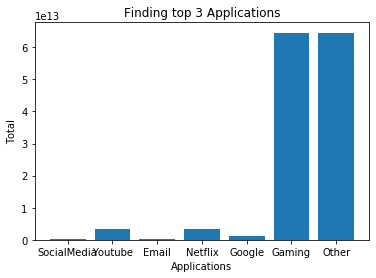

In [157]:
Applications = ['SocialMedia','Youtube','Email','Netflix','Google','Gaming','Other']
Total = total
plt.bar(Applications, Total)
plt.title("Finding top 3 Applications")
plt.xlabel("Applications")
plt.ylabel("Total")
plt.show();

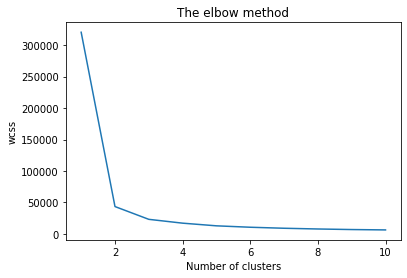

In [272]:
#finding optimum value of k
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

# Task 3

# Task 3.1

In [246]:
tele['Avg RTT'] = tele['Avg RTT DL (ms)'] + tele['Avg RTT UL (ms)']
tele['Avg Bearer TP'] = tele['Avg Bearer TP DL (kbps)'] + tele['Avg Bearer TP UL (kbps)']
tele['TCP'] = tele['TCP DL Retrans. Vol (Bytes)'] + tele['TCP UL Retrans. Vol (Bytes)']

In [247]:

gb = tele.groupby(['MSISDN/Number']) 
counts = gb.size().to_frame(name='counts')
tele_df=pd.DataFrame((counts.join(gb.agg({'Avg RTT': 'sum'}).rename(columns={'Avg RTT': 'Avg RTT sum'})).join(gb.agg({'Avg Bearer TP': 'sum'}).rename(columns={'Avg Bearer TP': 'Avg Bearer TP sum'})).join(gb.agg({'TCP': 'sum'}).rename(columns={'TCP': 'TCP sum'})).join(gb.agg({'Handset Type': 'count'}).rename(columns={'Handset Type': 'Handset Type count'})).reset_index()))

In [248]:
tele_df.head()

,MSISDN/Number,counts,Avg RTT sum,Avg Bearer TP sum,TCP sum,Handset Type count
0,3.360100e+10,1,46.000000,76.0,2.156957e+07,1
1,3.360100e+10,1,31.000000,99.0,2.156957e+07,1
2,3.360100e+10,1,127.458589,97.0,2.156957e+07,1
3,3.360101e+10,1,84.000000,248.0,7.607247e+05,1
4,3.360101e+10,2,119.000000,56844.0,3.094040e+07,2


In [249]:
#find mising data and change with mode
tele_df.fillna(tele_df.mode()).head()

,MSISDN/Number,counts,Avg RTT sum,Avg Bearer TP sum,TCP sum,Handset Type count
0,3.360100e+10,1,46.000000,76.0,2.156957e+07,1
1,3.360100e+10,1,31.000000,99.0,2.156957e+07,1
2,3.360100e+10,1,127.458589,97.0,2.156957e+07,1
3,3.360101e+10,1,84.000000,248.0,7.607247e+05,1
4,3.360101e+10,2,119.000000,56844.0,3.094040e+07,2


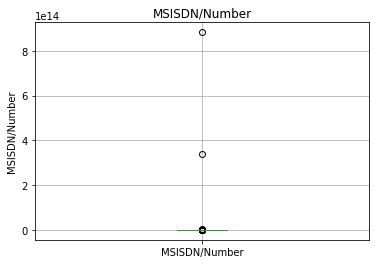

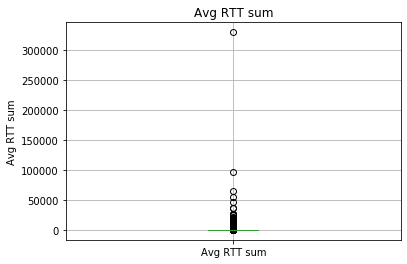

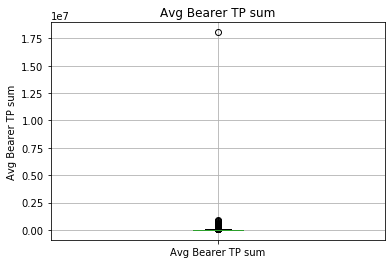

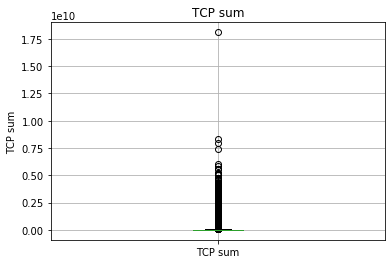

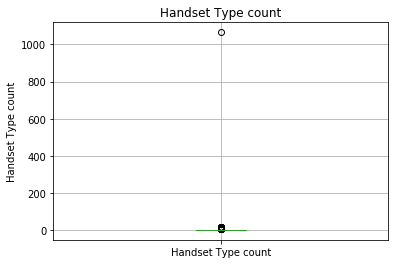

In [250]:
#finding outliers 
def find_outliers(df, var):
    
    df.boxplot(var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in ['MSISDN/Number','Avg RTT sum','Avg Bearer TP sum','TCP sum','Handset Type count']:
    find_outliers(tele_df, var)

In [251]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [252]:
# find limits Avg RTT sum
Dur_upper_limit, Dur_lower_limit = find_normal_boundaries(tele_df, 'Avg RTT sum', 1.5)
Dur_upper_limit, Dur_lower_limit

(1993.9416107328884, -1636.1004622205123)

In [253]:
# find limits Avg Bearer TP sum
Dur_upper_limit, Dur_lower_limit = find_normal_boundaries(tele_df, 'Avg Bearer TP sum', 1.5)
Dur_upper_limit, Dur_lower_limit

(125587.18342873779, -83276.9709765821)

In [254]:
# find limits TCP sum
Dur_upper_limit, Dur_lower_limit = find_normal_boundaries(tele_df, 'TCP sum', 1.5)
Dur_upper_limit, Dur_lower_limit

(274838286.11936694, -214281513.80040938)

In [255]:
# Now let's replace the outliers by the maximum and minimum limit

tele_df['Avg RTT sum']= np.where(tele_df['Avg RTT sum'] > Total_UL_upper_limit, Total_UL_upper_limit,
                       np.where(tele_df['Avg RTT sum'] < Total_UL_lower_limit, Total_UL_lower_limit, tele_df['Avg RTT sum']))

In [256]:
# Now let's replace the outliers by the maximum and minimum limit

tele_df['Avg Bearer TP sum']= np.where(tele_df['Avg Bearer TP sum'] > Total_UL_upper_limit, Total_UL_upper_limit,
                       np.where(tele_df['Avg Bearer TP sum'] < Total_UL_lower_limit, Total_UL_lower_limit, tele_df['Avg Bearer TP sum']))

In [257]:
# Now let's replace the outliers by the maximum and minimum limit

tele_df['TCP sum']= np.where(tele_df['TCP sum'] > Total_UL_upper_limit, Total_UL_upper_limit,
                       np.where(tele_df['TCP sum'] < Total_UL_lower_limit, Total_UL_lower_limit, tele_df['TCP sum']))

# task 3.2

In [206]:
#top 10 largest values for 'TCP sum','Avg Bearer TP sum','Avg RTT sum'
tele_df.nlargest(10, ['TCP sum','Avg Bearer TP sum','Avg RTT sum'],keep='first')

,MSISDN/Number,counts,Avg RTT sum,Avg Bearer TP sum,TCP sum,Handset Type count
65,3.360114e+10,2,2.420663e+07,2.420663e+07,5.803579e+07,2
121,3.360125e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3
133,3.360127e+10,5,2.420663e+07,2.420663e+07,5.803579e+07,5
139,3.360127e+10,1,2.420663e+07,2.420663e+07,5.803579e+07,1
170,3.360133e+10,1,2.420663e+07,2.420663e+07,5.803579e+07,1
181,3.360135e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3
200,3.360139e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3
211,3.360143e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3
231,3.360146e+10,4,2.420663e+07,2.420663e+07,5.803579e+07,4
247,3.360149e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3


In [208]:
#bottom 10 smallest values for 'TCP sum','Avg Bearer TP sum','Avg RTT sum'
tele_df.nlargest(10, ['TCP sum','Avg Bearer TP sum','Avg RTT sum'],keep='last')

,MSISDN/Number,counts,Avg RTT sum,Avg Bearer TP sum,TCP sum,Handset Type count
106853,4.188282e+10,1066,2.420663e+07,2.420663e+07,5.803579e+07,1066
106838,3.378988e+10,4,2.420663e+07,2.420663e+07,5.803579e+07,4
106823,3.378977e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3
106770,3.378950e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3
106726,3.378905e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3
106704,3.378875e+10,2,2.420663e+07,2.420663e+07,5.803579e+07,2
106683,3.378859e+10,5,2.420663e+07,2.420663e+07,5.803579e+07,5
106640,3.378838e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3
106592,3.378818e+10,4,2.420663e+07,2.420663e+07,5.803579e+07,4
106572,3.378807e+10,3,2.420663e+07,2.420663e+07,5.803579e+07,3


In [226]:
# get top 10 most frequent names
n = 10
top=tele_df['TCP sum'].value_counts().index.tolist()
top[:n]

[24206626.520073153,
 43139145.87030599,
 58035786.06414018,
 42380781.205494925,
 42380817.205494925,
 42380805.205494925,
 42382147.205494925,
 43900134.53511706,
 42380707.205494925,
 43898842.53511706]

In [234]:
# get top 10 most frequent names
n = 10
top=tele_df['Avg Bearer TP sum'].value_counts().index.tolist()
top[:n]

[24206626.520073153]

In [233]:
# get top 10 most frequent names
n = 10
top=tele_df['Avg RTT sum'].value_counts().index.tolist()
top[:n]

[24206626.520073153]

# Task 3.3

In [242]:
# gb = tele.groupby(['Handset Type']) 
counts = gb.size().to_frame(name='counts')
tele_df1=pd.DataFrame((counts.join(gb.agg({'Avg Bearer TP': 'sum'}).rename(columns={'Avg Bearer TP': 'Avg Bearer TP sum'})).reset_index()))

In [243]:
tele_df1.head()

,Handset Type,counts,Avg Bearer TP sum
0,A-Link Telecom I. Cubot A5,1,23510.0
1,A-Link Telecom I. Cubot Note Plus,1,6699.0
2,A-Link Telecom I. Cubot Note S,1,8937.0
3,A-Link Telecom I. Cubot Nova,1,56217.0
4,A-Link Telecom I. Cubot Power,1,69468.0


In [244]:

gb = tele.groupby(['Handset Type']) 
counts = gb.size().to_frame(name='counts')
tele_df2=pd.DataFrame((counts.join(gb.agg({'TCP': 'sum'}).rename(columns={'TCP': 'TCP sum'})).reset_index()))

In [245]:
tele_df2.head()

,Handset Type,counts,TCP sum
0,A-Link Telecom I. Cubot A5,1,2.156957e+07
1,A-Link Telecom I. Cubot Note Plus,1,6.162130e+05
2,A-Link Telecom I. Cubot Note S,1,4.141173e+07
3,A-Link Telecom I. Cubot Nova,1,1.371700e+05
4,A-Link Telecom I. Cubot Power,1,8.041000e+03


# Task 3.4

In [258]:
tele_df.head()

,MSISDN/Number,counts,Avg RTT sum,Avg Bearer TP sum,TCP sum,Handset Type count
0,3.360100e+10,1,2.420663e+07,2.420663e+07,2.420663e+07,1
1,3.360100e+10,1,2.420663e+07,2.420663e+07,2.420663e+07,1
2,3.360100e+10,1,2.420663e+07,2.420663e+07,2.420663e+07,1
3,3.360101e+10,1,2.420663e+07,2.420663e+07,2.420663e+07,1
4,3.360101e+10,2,2.420663e+07,2.420663e+07,3.094040e+07,2


In [260]:
X=tele_df.iloc[:,[2,3,4,5]].values

In [261]:
#Applying k-means in the mall dataset
from sklearn.cluster import KMeans
kmeans=kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

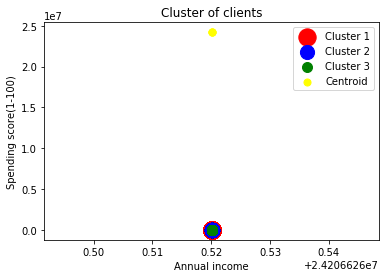

In [266]:
#Visualising the cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,3],s=300,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,3],s=200,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,3],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroid')
plt.title('Cluster of clients')
plt.xlabel('Annual income')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

# Task 4

# Task 4.1

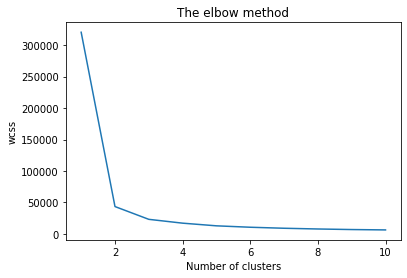

In [281]:
#finding optimum value of k
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [288]:
tele_df.head()

,MSISDN/Number,sessions_frequency,session_duration,total_traffic
0,3.360100e+10,1,116720140.0,8.786906e+08
1,3.360100e+10,1,181230963.0,1.568596e+08
2,3.360100e+10,1,134969374.0,5.959665e+08
3,3.360101e+10,1,49878024.0,4.261998e+08
4,3.360101e+10,2,37104453.0,1.457411e+09


In [349]:
#engagement score to each user
import numpy as np
import pandas as pd
import sklearn.cluster as cluster
import scipy.spatial.distance as sdist

points = tele_df[['MSISDN/Number', 'sessions_frequency','session_duration', 'total_traffic']]
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(points)
tele_df['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=tele_df.index)
tele_df = pd.concat([tele_df, dists], axis=1)
print(tele_df)

        MSISDN/Number  sessions_frequency  session_duration  total_traffic  \
0        3.360100e+10                   1      1.167201e+08   8.786906e+08   
1        3.360100e+10                   1      1.812310e+08   1.568596e+08   
2        3.360100e+10                   1      1.349694e+08   5.959665e+08   
3        3.360101e+10                   1      4.987802e+07   4.261998e+08   
4        3.360101e+10                   2      3.710445e+07   1.457411e+09   
5        3.360101e+10                   2      2.539831e+08   6.263031e+08   
6        3.360101e+10                   2      1.283605e+08   6.384173e+08   
7        3.360101e+10                   1      8.639998e+07   3.326604e+08   
8        3.360101e+10                   2      3.820155e+08   9.901322e+08   
9        3.360102e+10                   1      1.248548e+08   7.324638e+08   
10       3.360102e+10                   1      2.261655e+08   1.149760e+08   
11       3.360102e+10                   1      3.841620e+07   6.

In [346]:
#experience score to each user

gb = tele.groupby(['MSISDN/Number']) 
counts = gb.size().to_frame(name='counts')
tele_df1=pd.DataFrame((counts.join(gb.agg({'Avg RTT': 'sum'}).rename(columns={'Avg RTT': 'Avg RTT sum'})).join(gb.agg({'Avg Bearer TP': 'sum'}).rename(columns={'Avg Bearer TP': 'Avg Bearer TP sum'})).join(gb.agg({'TCP': 'sum'}).rename(columns={'TCP': 'TCP sum'})).join(gb.agg({'Handset Type': 'count'}).rename(columns={'Handset Type': 'Handset Type count'})).reset_index()))

points = tele_df1[['MSISDN/Number', 'Avg RTT sum','Avg Bearer TP sum','TCP sum','Handset Type count']]
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(points)
tele_df1['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=tele_df.index)
tele_df1 = pd.concat([tele_df1, dists], axis=1)
print(tele_df1)

        MSISDN/Number  counts    Avg RTT sum  Avg Bearer TP sum       TCP sum  \
0        3.360100e+10       1      46.000000               76.0  2.156957e+07   
1        3.360100e+10       1      31.000000               99.0  2.156957e+07   
2        3.360100e+10       1     127.458589               97.0  2.156957e+07   
3        3.360101e+10       1      84.000000              248.0  7.607247e+05   
4        3.360101e+10       2     119.000000            56844.0  3.094040e+07   
5        3.360101e+10       2     151.458589             7908.0  2.233199e+07   
6        3.360101e+10       2      53.000000            42513.0  2.167980e+07   
7        3.360101e+10       1      52.000000             1247.0  7.599367e+05   
8        3.360101e+10       2     254.917178              189.0  4.313915e+07   
9        3.360102e+10       1      62.000000              146.0  2.081121e+07   
10       3.360102e+10       1      29.000000               77.0  2.156957e+07   
11       3.360102e+10       

# Task 4.2

In [307]:
tele_df1.head()

,MSISDN/Number,counts,Avg RTT sum,Avg Bearer TP sum,TCP sum,Handset Type count,cluster,dist_0,dist_1,dist_2
0,3.360100e+10,1,46.000000,76.0,2.156957e+07,1,0,1.032191e+08,8.823635e+14,3.369664e+14
1,3.360100e+10,1,31.000000,99.0,2.156957e+07,1,0,1.032191e+08,8.823635e+14,3.369664e+14
2,3.360100e+10,1,127.458589,97.0,2.156957e+07,1,0,1.032183e+08,8.823635e+14,3.369664e+14
3,3.360101e+10,1,84.000000,248.0,7.607247e+05,1,0,1.069971e+08,8.823635e+14,3.369664e+14
4,3.360101e+10,2,119.000000,56844.0,3.094040e+07,2,0,1.028463e+08,8.823635e+14,3.369664e+14


In [312]:
tele_df1['dist_0'].head()

0    1.032191e+08
1    1.032191e+08
2    1.032183e+08
3    1.069971e+08
4    1.028463e+08
Name: dist_0, dtype: float64

In [308]:
tele_df.head()

,MSISDN/Number,sessions_frequency,session_duration,total_traffic,cluster,dist_0,dist_1,dist_2
0,3.360100e+10,1,116720140.0,8.786906e+08,0,2.108224e+08,8.823635e+14,3.369664e+14
1,3.360100e+10,1,181230963.0,1.568596e+08,0,5.504714e+08,8.823635e+14,3.369664e+14
2,3.360100e+10,1,134969374.0,5.959665e+08,0,1.434690e+08,8.823635e+14,3.369664e+14
3,3.360101e+10,1,49878024.0,4.261998e+08,0,3.019318e+08,8.823635e+14,3.369664e+14
4,3.360101e+10,2,37104453.0,1.457411e+09,0,7.750321e+08,8.823635e+14,3.369664e+14


In [300]:
tele_df.groupby('MSISDN/Number')['dist_0','dist_1','dist_2'].mean().head(10)

,dist_0,dist_1,dist_2
MSISDN/Number,,,
3.360100e+10,1.032191e+08,8.823635e+14,3.369664e+14
3.360100e+10,1.032191e+08,8.823635e+14,3.369664e+14
3.360100e+10,1.032183e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.069971e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.028463e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.031486e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.032000e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.069934e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.036391e+08,8.823635e+14,3.369664e+14


In [318]:
tele_df1.groupby('MSISDN/Number')['dist_0','dist_1','dist_2'].mean().head(10)

,dist_0,dist_1,dist_2
MSISDN/Number,,,
3.360100e+10,1.032191e+08,8.823635e+14,3.369664e+14
3.360100e+10,1.032191e+08,8.823635e+14,3.369664e+14
3.360100e+10,1.032183e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.069971e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.028463e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.031486e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.032000e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.069934e+08,8.823635e+14,3.369664e+14
3.360101e+10,1.036391e+08,8.823635e+14,3.369664e+14


In [350]:
tele_df1['avg'] = tele_df1[['dist_0','dist_1','dist_2']].mean(axis=1)
tele_df1.head(10)

,MSISDN/Number,counts,Avg RTT sum,Avg Bearer TP sum,TCP sum,Handset Type count,cluster,dist_0,dist_1,dist_2,avg
0,3.360100e+10,1,46.000000,76.0,2.156957e+07,1,0,1.032191e+08,8.823635e+14,3.369664e+14,4.064433e+14
1,3.360100e+10,1,31.000000,99.0,2.156957e+07,1,0,1.032191e+08,8.823635e+14,3.369664e+14,4.064433e+14
2,3.360100e+10,1,127.458589,97.0,2.156957e+07,1,0,1.032183e+08,8.823635e+14,3.369664e+14,4.064433e+14
3,3.360101e+10,1,84.000000,248.0,7.607247e+05,1,0,1.069971e+08,8.823635e+14,3.369664e+14,4.064434e+14
4,3.360101e+10,2,119.000000,56844.0,3.094040e+07,2,0,1.028463e+08,8.823635e+14,3.369664e+14,4.064433e+14
5,3.360101e+10,2,151.458589,7908.0,2.233199e+07,2,0,1.031486e+08,8.823635e+14,3.369664e+14,4.064433e+14
6,3.360101e+10,2,53.000000,42513.0,2.167980e+07,2,0,1.032000e+08,8.823635e+14,3.369664e+14,4.064433e+14
7,3.360101e+10,1,52.000000,1247.0,7.599367e+05,1,0,1.069934e+08,8.823635e+14,3.369664e+14,4.064434e+14
8,3.360101e+10,2,254.917178,189.0,4.313915e+07,2,0,1.036391e+08,8.823635e+14,3.369664e+14,4.064433e+14
9,3.360102e+10,1,62.000000,146.0,2.081121e+07,1,0,1.032673e+08,8.823635e+14,3.369664e+14,4.064433e+14


In [351]:
tele_df['avg'] = tele_df[['dist_0','dist_1','dist_2']].mean(axis=1)
tele_df.head(10)

,MSISDN/Number,sessions_frequency,session_duration,total_traffic,cluster,dist_0,dist_1,dist_2,avg
0,3.360100e+10,1,1.167201e+08,8.786906e+08,0,2.108224e+08,8.823635e+14,3.369664e+14,4.064434e+14
1,3.360100e+10,1,1.812310e+08,1.568596e+08,0,5.504714e+08,8.823635e+14,3.369664e+14,4.064435e+14
2,3.360100e+10,1,1.349694e+08,5.959665e+08,0,1.434690e+08,8.823635e+14,3.369664e+14,4.064434e+14
3,3.360101e+10,1,4.987802e+07,4.261998e+08,0,3.019318e+08,8.823635e+14,3.369664e+14,4.064434e+14
4,3.360101e+10,2,3.710445e+07,1.457411e+09,0,7.750321e+08,8.823635e+14,3.369664e+14,4.064436e+14
5,3.360101e+10,2,2.539831e+08,6.263031e+08,0,1.696889e+08,8.823635e+14,3.369664e+14,4.064434e+14
6,3.360101e+10,2,1.283605e+08,6.384173e+08,0,1.182562e+08,8.823635e+14,3.369664e+14,4.064434e+14
7,3.360101e+10,1,8.639998e+07,3.326604e+08,0,3.811093e+08,8.823635e+14,3.369664e+14,4.064434e+14
8,3.360101e+10,2,3.820155e+08,9.901322e+08,0,3.955967e+08,8.823635e+14,3.369664e+14,4.064434e+14
9,3.360102e+10,1,1.248548e+08,7.324638e+08,0,1.099599e+08,8.823635e+14,3.369664e+14,4.064434e+14


# Task 4.3

In [319]:
##Multiple Linear Regression engagement score 

In [321]:
X = tele_df.iloc[:, 1:4].values
y = tele_df.iloc[:, 8].values

In [322]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [323]:
#Fitting mutiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [324]:
#Predicting the test set results
y_pred=regressor.predict(X_test)

In [325]:
y_pred

array([4.06442228e+14, 4.06444567e+14, 4.06445841e+14, ...,
       4.06444553e+14, 4.06444633e+14, 4.06444581e+14])

In [328]:
y_test

array([4.06443509e+14, 4.06443385e+14, 4.06443450e+14, ...,
       4.06443312e+14, 4.06443401e+14, 4.06443430e+14])

In [ ]:
#multiple linear regression for experience scores

In [330]:
X = tele_df1.iloc[:, 2:5].values
y = tele_df1.iloc[:, 10].values

In [331]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [332]:
#Fitting mutiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [333]:
#Predicting the test set results
y_pred=regressor.predict(X_test)

In [334]:
y_pred

array([4.06443765e+14, 4.06444240e+14, 4.06444179e+14, ...,
       4.06444196e+14, 4.06444175e+14, 4.06444196e+14])

In [335]:
y_test

array([4.06443308e+14, 4.06443259e+14, 4.06443285e+14, ...,
       4.06443266e+14, 4.06443253e+14, 4.06443325e+14])

# Task 4.4

In [352]:
X=tele_df.iloc[:,[1,2,3]]

In [353]:
#Applying k-means in the mall dataset
from sklearn.cluster import KMeans
kmeans=kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [355]:
X=tele_df1.iloc[:,[2,3,4,5,10]]

In [357]:
#Applying k-means in the mall dataset
from sklearn.cluster import KMeans
kmeans=kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [ ]:
#Visualising the cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=300,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=200,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='yellow',label='Centroid')
plt.title('Cluster of clients')
plt.xlabel('Annual income')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

# Task 4.5

In [359]:
tele_df.head()

,MSISDN/Number,sessions_frequency,session_duration,total_traffic,cluster,dist_0,dist_1,dist_2,avg
0,3.360100e+10,1,116720140.0,8.786906e+08,0,2.108224e+08,8.823635e+14,3.369664e+14,4.064434e+14
1,3.360100e+10,1,181230963.0,1.568596e+08,0,5.504714e+08,8.823635e+14,3.369664e+14,4.064435e+14
2,3.360100e+10,1,134969374.0,5.959665e+08,0,1.434690e+08,8.823635e+14,3.369664e+14,4.064434e+14
3,3.360101e+10,1,49878024.0,4.261998e+08,0,3.019318e+08,8.823635e+14,3.369664e+14,4.064434e+14
4,3.360101e+10,2,37104453.0,1.457411e+09,0,7.750321e+08,8.823635e+14,3.369664e+14,4.064436e+14


In [ ]:
gb = tele_df.groupby(['cluster']) 
clusters = gb.size().to_frame(name='cluster')
tele_df=pd.DataFrame((clusters.join(gb.agg({'MSISDN/Number': 'count'}).join(gb.agg({'sessions_frequency': 'count'}).join(gb.agg({'session_duration': 'sum'}).join(gb.agg({'total_traffic': 'sum'}).join(gb.agg({'dist_0': 'sum'}).join(gb.agg({'dist_1': 'sum'}).join(gb.agg({'dist_2': 'sum'}).join(gb.agg({'avg': 'sum'}).reset_index()))


In [363]:
tele_df1.head()

,MSISDN/Number,counts,Avg RTT sum,Avg Bearer TP sum,TCP sum,Handset Type count,cluster,dist_0,dist_1,dist_2,avg
0,3.360100e+10,1,46.000000,76.0,2.156957e+07,1,0,1.032191e+08,8.823635e+14,3.369664e+14,4.064433e+14
1,3.360100e+10,1,31.000000,99.0,2.156957e+07,1,0,1.032191e+08,8.823635e+14,3.369664e+14,4.064433e+14
2,3.360100e+10,1,127.458589,97.0,2.156957e+07,1,0,1.032183e+08,8.823635e+14,3.369664e+14,4.064433e+14
3,3.360101e+10,1,84.000000,248.0,7.607247e+05,1,0,1.069971e+08,8.823635e+14,3.369664e+14,4.064434e+14
4,3.360101e+10,2,119.000000,56844.0,3.094040e+07,2,0,1.028463e+08,8.823635e+14,3.369664e+14,4.064433e+14


In [ ]:
gb = tele_df.groupby(['cluster']) 
clusters = gb.size().to_frame(name='cluster')
tele_df=pd.DataFrame((clusters.join(gb.agg({'MSISDN/Number': 'count'}).join(gb.agg({'Avg RTT sum': 'sum'}).join(gb.agg({'Avg Bearer TP sum': 'sum'}).join(gb.agg({'TCP sum': 'sum'}).join(gb.agg({'Handset Type count': 'sum'}).join(gb.agg({'dist_0': 'sum'}).join(gb.agg({'dist_1': 'sum'}).join(gb.agg({'dist_2': 'sum'}).join(gb.agg({'avg': 'sum'}).reset_index()))


# Task 4.6